In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df= pd.read_csv("Iris_for_decision_tree_classifier.csv")

In [44]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [45]:
df.drop('Id', axis=1, inplace= True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
df.shape

(150, 5)

In [48]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
df.isnull().sum().sum()

0

In [50]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

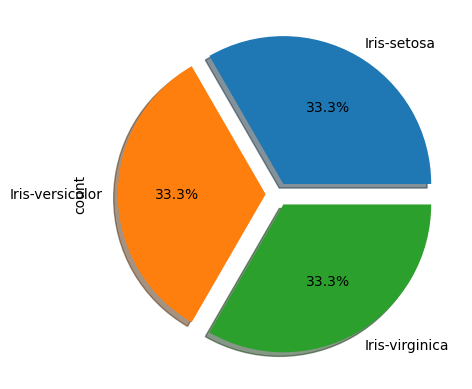

In [51]:
df['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True, explode = [0.08,0.08,0.08])
plt.show();

C:\Users\honey\anaconda_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


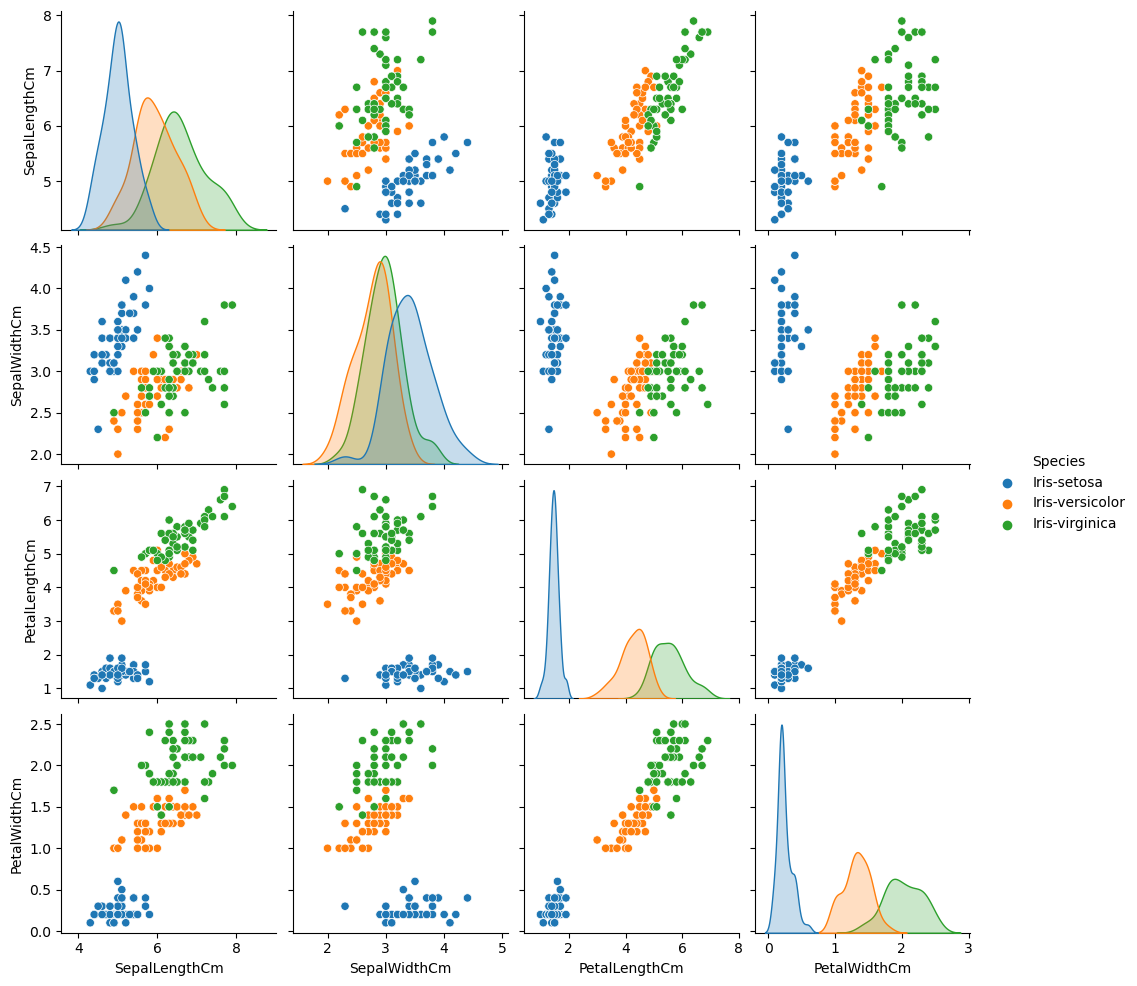

In [52]:
sns.pairplot(data=df, hue= 'Species')
plt.show();

In [53]:
df = df.apply(pd.to_numeric, errors='ignore')
df_new = pd.get_dummies(df, drop_first=False)

# Display the updated DataFrame
df_new.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False


In [54]:
df_new[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']] = df_new[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']].astype(int)
df_new.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
140,6.7,3.1,5.6,2.4,0,0,1
141,6.9,3.1,5.1,2.3,0,0,1
142,5.8,2.7,5.1,1.9,0,0,1
143,6.8,3.2,5.9,2.3,0,0,1
144,6.7,3.3,5.7,2.5,0,0,1
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1
149,5.9,3.0,5.1,1.8,0,0,1


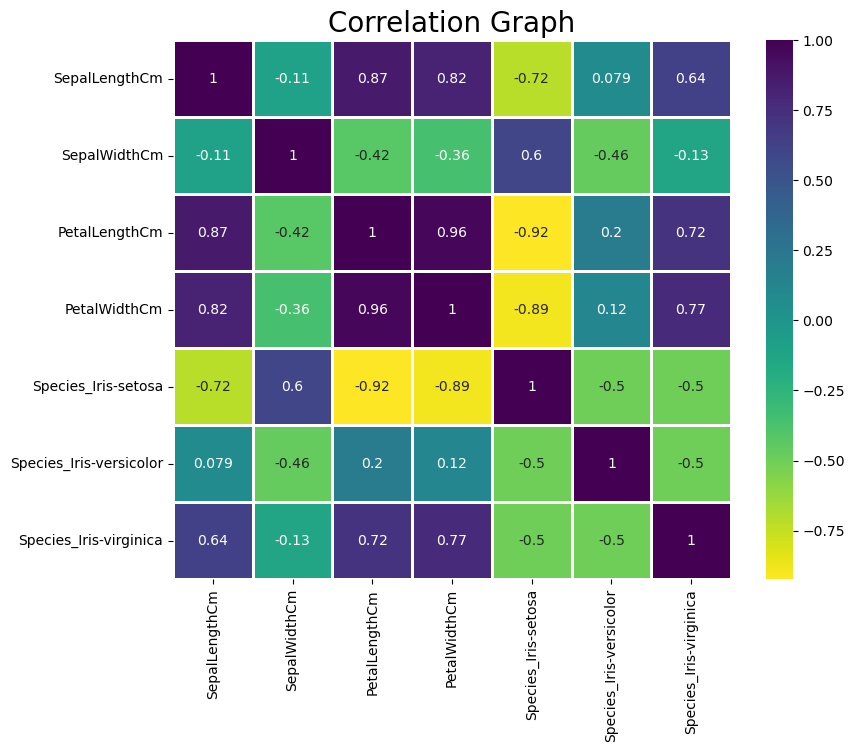

In [55]:
#Correlation Heatmap
plt.figure(figsize=(9,7))
sns.heatmap(df_new.corr(),cmap='viridis_r',annot=True,linewidths=2)
plt.title("Correlation Graph",size=20)
plt.show();

In [56]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SepalLengthCm            150 non-null    float64
 1   SepalWidthCm             150 non-null    float64
 2   PetalLengthCm            150 non-null    float64
 3   PetalWidthCm             150 non-null    float64
 4   Species_Iris-setosa      150 non-null    int32  
 5   Species_Iris-versicolor  150 non-null    int32  
 6   Species_Iris-virginica   150 non-null    int32  
dtypes: float64(4), int32(3)
memory usage: 6.6 KB


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [58]:
# Features (X) and target (y)
X = df_new[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df_new[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

In [77]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [79]:
y_pred = clf.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 100.00%


In [80]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

# Print the average accuracy across folds
print(f"Average Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


Average Cross-Validation Accuracy: 90.67%


In [81]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with limited depth: {accuracy * 100:.2f}%")


Accuracy with limited depth: 97.78%


In [70]:
pip install scikit-learn --upgrade

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/11.0 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.0 MB 3.1 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/11.0 MB 5.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/11.0 MB 6.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.0 MB 6.8 MB/s eta 0:00:02
   -------- ------------------

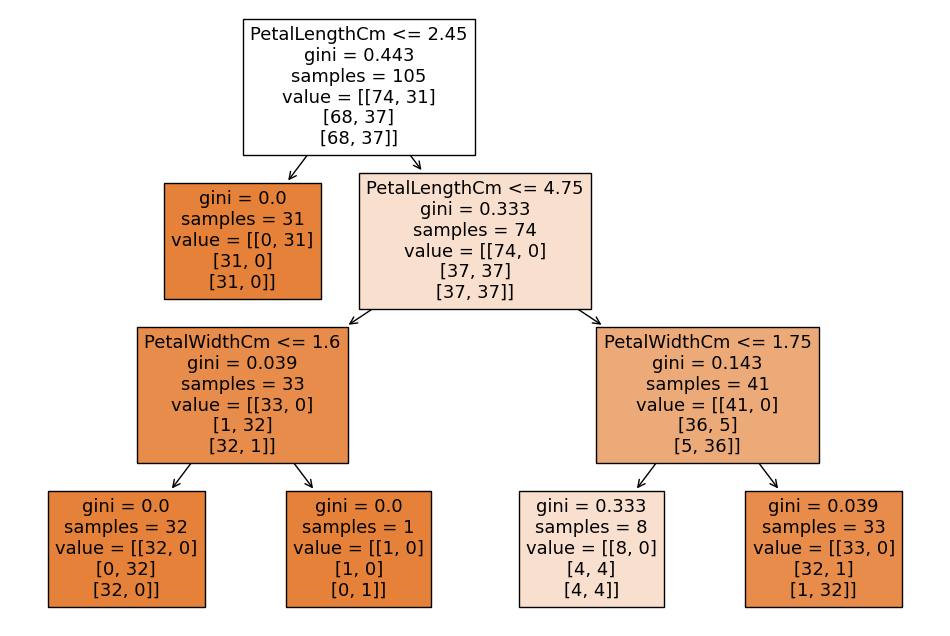

In [82]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=y.columns.tolist(), filled=True)
plt.show();

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        13

   micro avg       1.00      0.98      0.99        45
   macro avg       1.00      0.97      0.99        45
weighted avg       1.00      0.98      0.99        45
 samples avg       0.98      0.98      0.98        45



C:\Users\honey\anaconda_new\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]


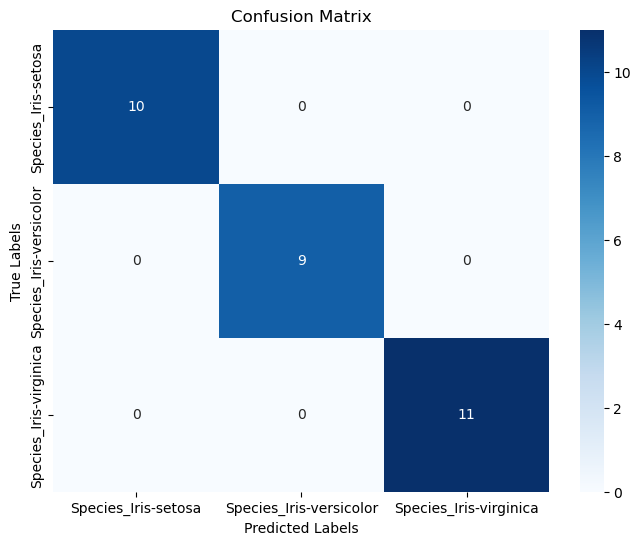

In [87]:
df_new['Species'] = df_new[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']].idxmax(axis=1)

# Features (X) and target (y)
X = df_new[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df_new['Species']  # Single target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Convert predictions and actual values to single-label format
y_test_single = y_test
y_pred_single = y_pred

# Generate the confusion matrix
cm = confusion_matrix(y_test_single, y_pred_single, labels=clf.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

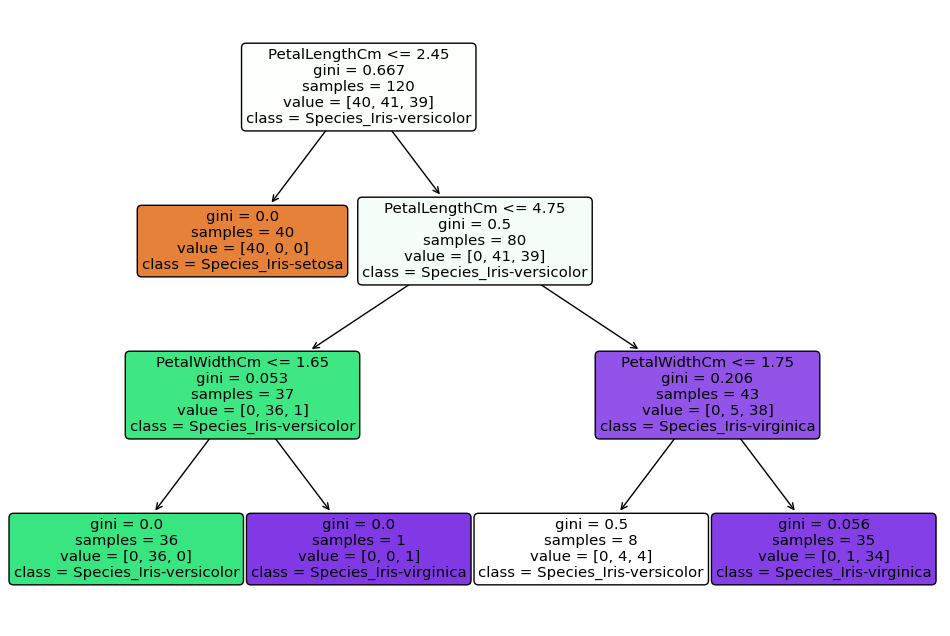

In [89]:
feature_names = X.columns.tolist()
# Convert target labels to a list
class_names = y.unique().tolist()

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show();

In [93]:
# Generate random feature values within a reasonable range for the Iris dataset
random_values = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Example 1
    [6.7, 3.1, 4.4, 1.4],  # Example 2
    [7.2, 3.6, 6.1, 2.5]   # Example 3
])

# Predict the class labels for the random values
predictions = clf.predict(random_values)

# Check what predictions contain
print("Predictions:", predictions)

# Assuming class_names is a list of class names
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# If predictions are indices, convert them to class names
if isinstance(predictions[0], int):
    predicted_classes = [class_names[pred] for pred in predictions]
else:
    predicted_classes = predictions

# Print the predictions
for i, (value, pred_class) in enumerate(zip(random_values, predicted_classes), start=1):
    print(f"Random Example {i} - Features: {value} -> Predicted Class: {pred_class}")

Predictions: ['Species_Iris-setosa' 'Species_Iris-versicolor' 'Species_Iris-virginica']
Random Example 1 - Features: [5.1 3.5 1.4 0.2] -> Predicted Class: Species_Iris-setosa
Random Example 2 - Features: [6.7 3.1 4.4 1.4] -> Predicted Class: Species_Iris-versicolor
Random Example 3 - Features: [7.2 3.6 6.1 2.5] -> Predicted Class: Species_Iris-virginica


C:\Users\honey\anaconda_new\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  call to `partial_fit`. All other methods that validate `X`
